Begin by importing necessary libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import data_vis_helper as dh


from get_dataset import X, y, df

img_directory = "data_visualization_images"

# from get_dataset import y

from sklearn.model_selection import train_test_split

seed = 1234

Let's take a look at our data

In [2]:
categorical = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'campaign', 'previous', 'poutcome']

In [3]:
df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# Summary statistics for numerical variables
print("Summary Statistics for Numerical Variables:")
numerical_stats = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].describe()

# numerical_stats = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
#        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
#        'previous', 'poutcome', 'y']].describe()

print(numerical_stats)

Summary Statistics for Numerical Variables:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000

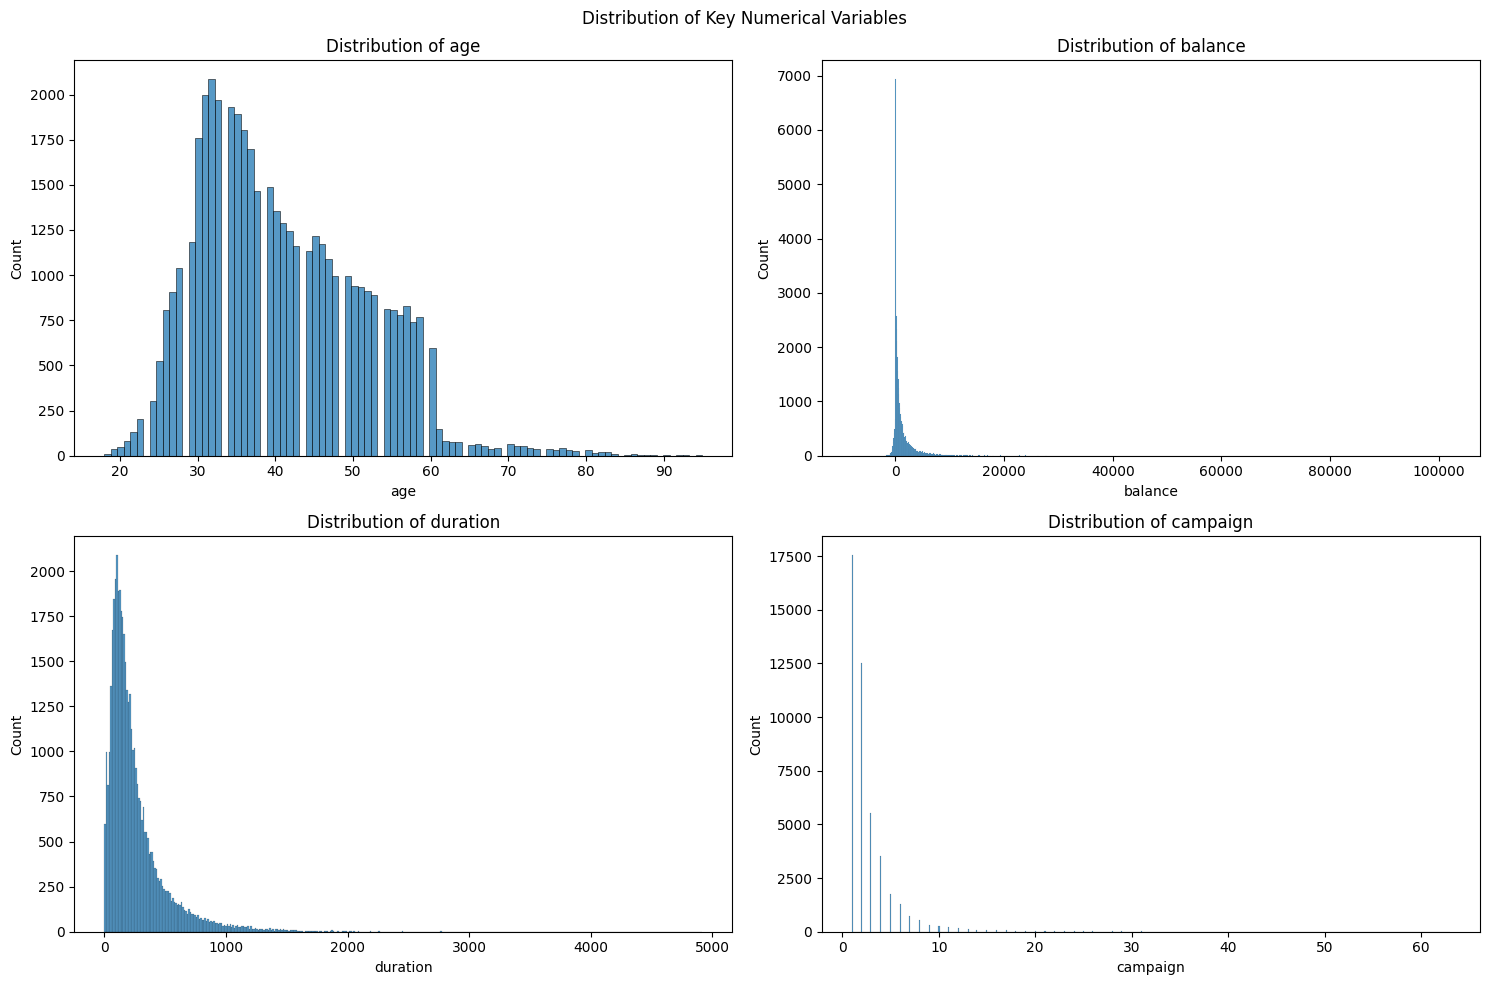

In [6]:
# Visualize distributions of numerical variables


numerical_cols = ['age', 'balance', 'duration', 'campaign']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Numerical Variables')

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

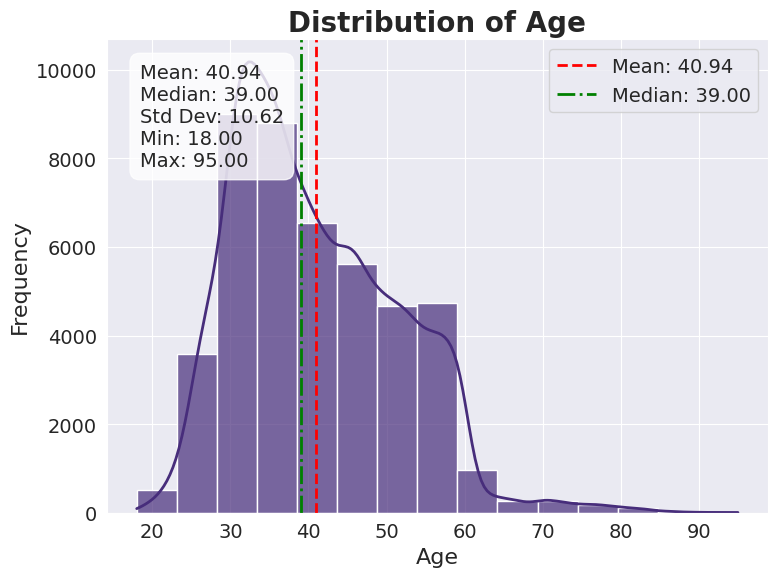

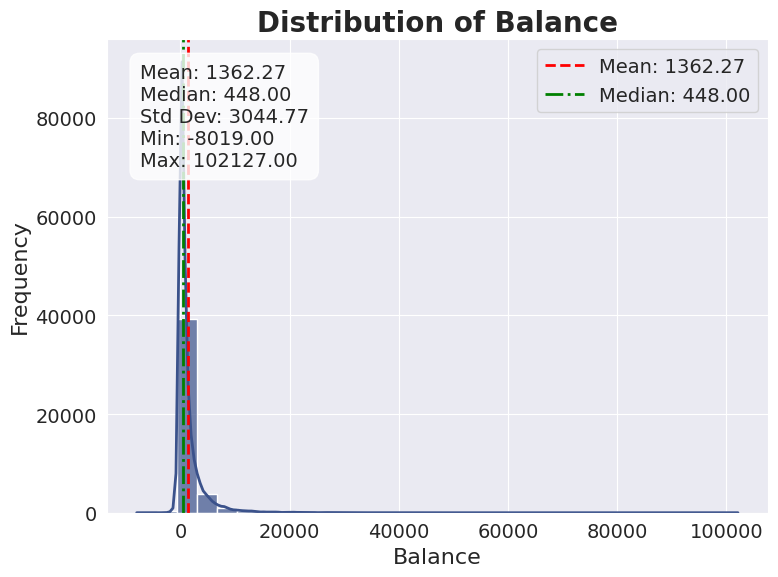

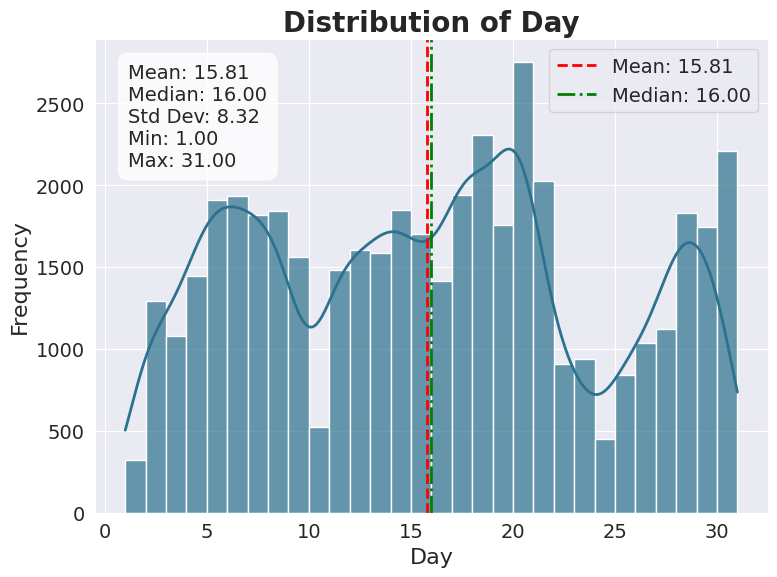

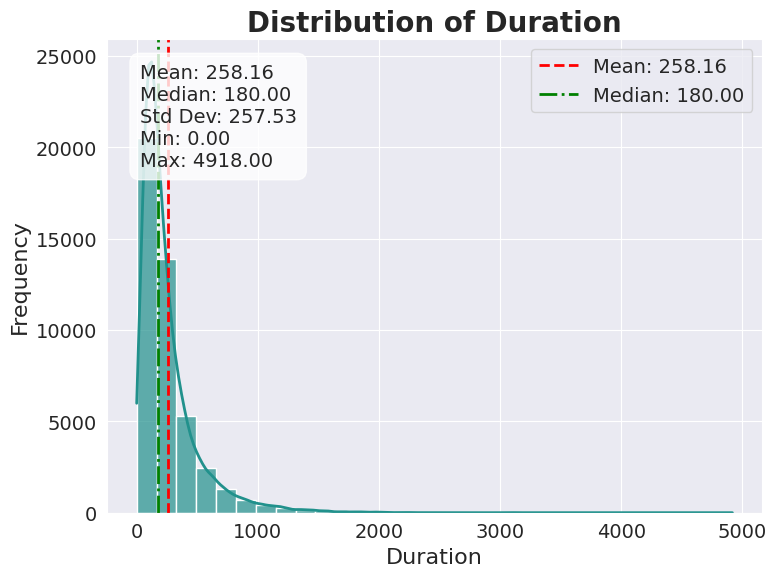

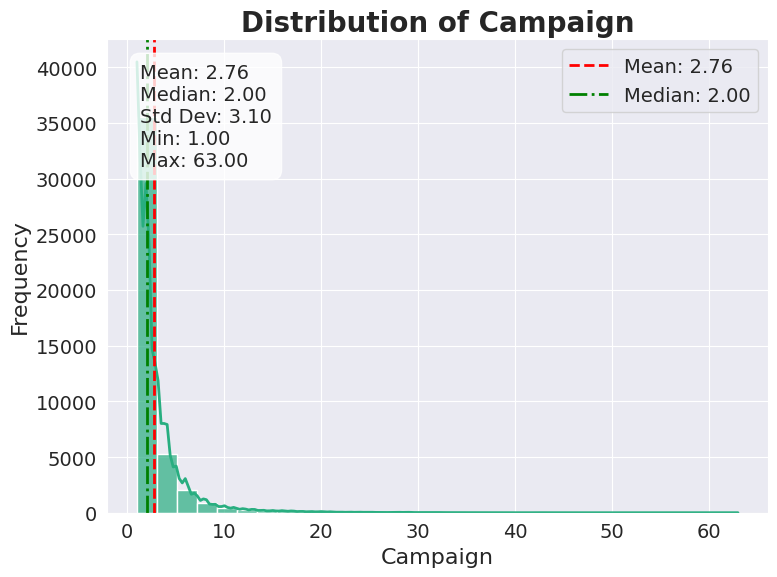

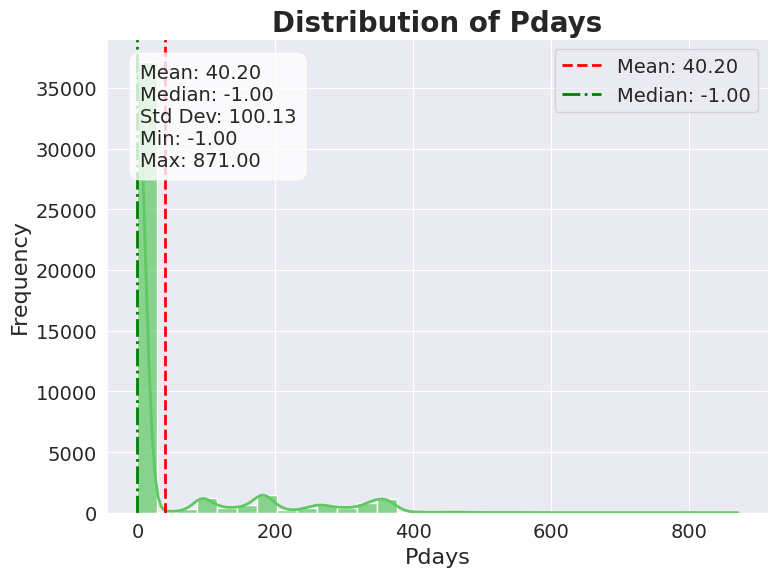

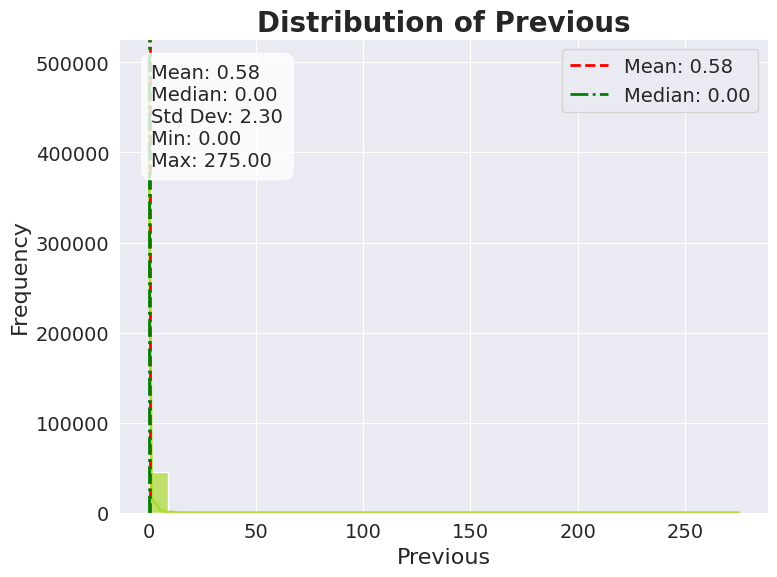

In [7]:

# Set a more appealing style and color palette
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 14})
colors = sns.color_palette("viridis", 7)

# Create individual plots with uniform size
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
uniform_figsize = (8, 6)  # Set uniform figure size for consistency

for i, col in enumerate(numerical_cols):
    plt.figure(figsize=uniform_figsize)
    
    # Create the histogram with KDE
    # For 'age', make the plot half as dense by doubling the bin width
    if col == 'age':
        bins = 15  # Half the number of bins for age
    else:
        bins = 30
        
    ax = sns.histplot(
        data=df, 
        x=col, 
        kde=True, 
        color=colors[i],
        alpha=0.7,
        bins=bins,
        line_kws={'linewidth': 2}
    )
    
    # Enhance the plot with statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Add title and labels with enhanced formatting
    plt.title(f'Distribution of {col.capitalize()}', fontsize=20, fontweight='bold')
    plt.xlabel(col.capitalize(), fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    
    # Add a text box with statistics
    stats_text = f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd Dev: {std_val:.2f}\nMin: {df[col].min():.2f}\nMax: {df[col].max():.2f}"
    plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', 
                 bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8),
                 va='top', fontsize=14)
    
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.savefig(f'{img_directory}/{col}_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()


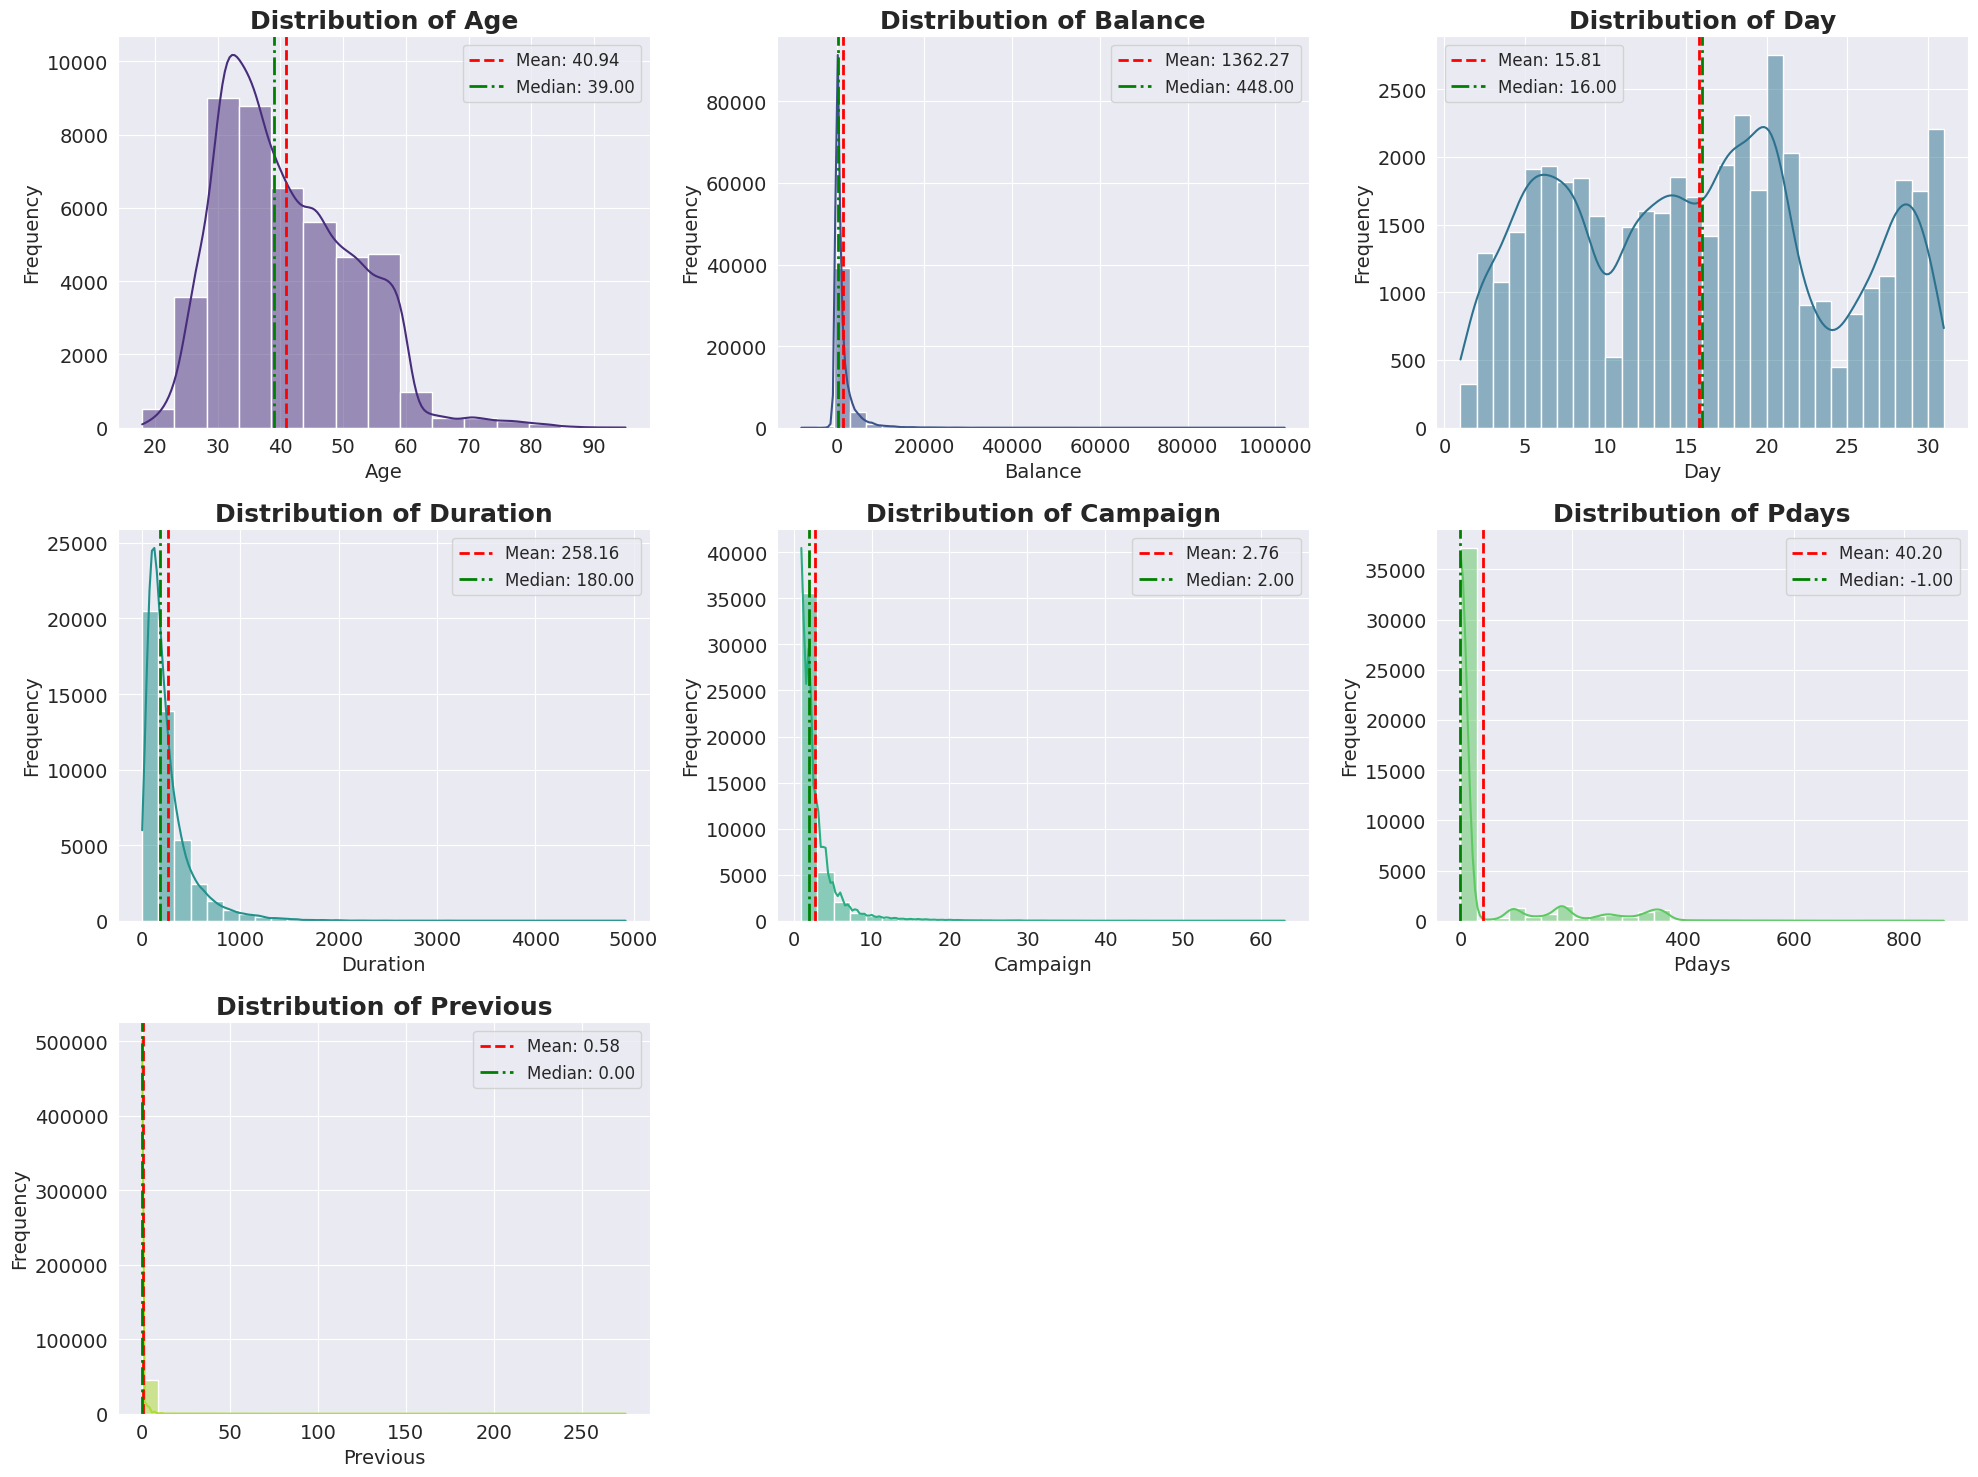

In [8]:
# Optional: Create a summary figure with all plots (still uniform)
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    
    # For 'age', make the plot half as dense
    if col == 'age':
        bins = 15  # Half the number of bins for age
    else:
        bins = 30
        
    sns.histplot(data=df, x=col, kde=True, color=colors[i-1], bins=bins)
    plt.title(f'Distribution of {col.capitalize()}', fontsize=18, fontweight='bold')
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')
    plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig(img_directory + '/all_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

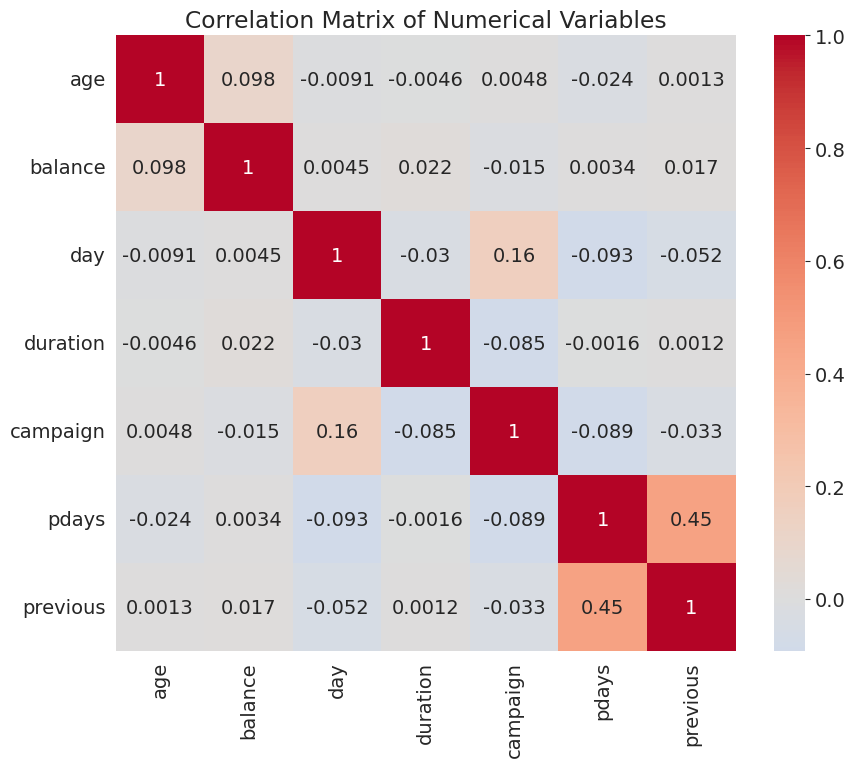

In [9]:
# Correlation analysis for numerical variables
numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
correlation_matrix = df[numerical_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


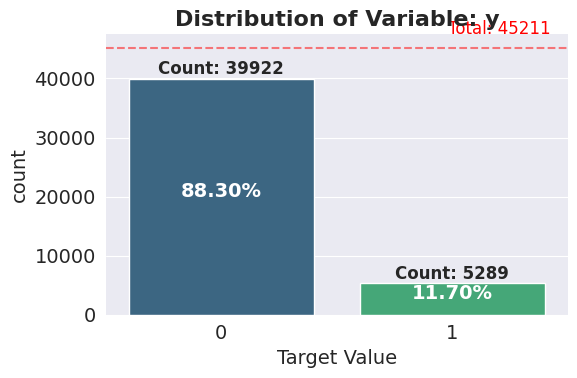


Class Distribution:
   Class  count  Percentage (%)
0      0  39922            88.3
1      1   5289            11.7


In [10]:
dh.plot(df, 'y', 'count')

/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


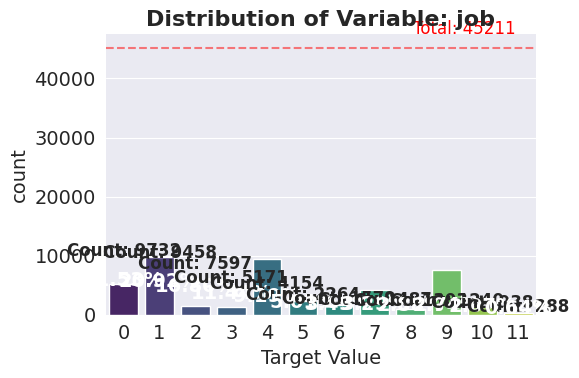


Class Distribution:
    Class  count  Percentage (%)
0       1   9732           21.53
1       4   9458           20.92
2       9   7597           16.80
3       0   5171           11.44
4       7   4154            9.19
5       5   2264            5.01
6       6   1579            3.49
7       2   1487            3.29
8      10   1303            2.88
9       3   1240            2.74
10      8    938            2.07
11     11    288            0.64


/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


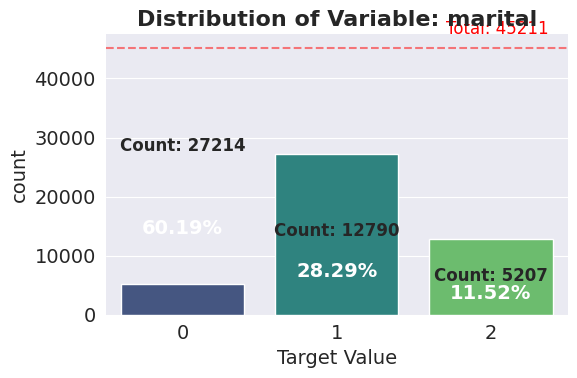


Class Distribution:
   Class  count  Percentage (%)
0      1  27214           60.19
1      2  12790           28.29
2      0   5207           11.52


/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


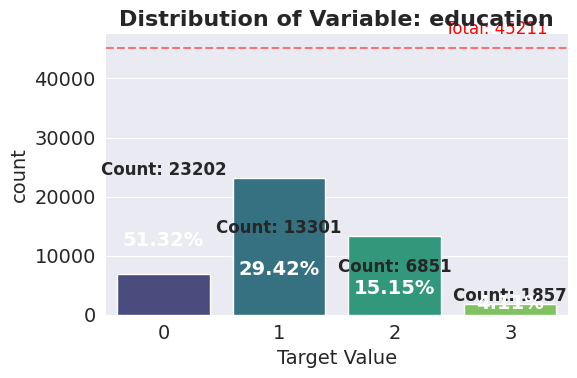


Class Distribution:
   Class  count  Percentage (%)
0      1  23202           51.32
1      2  13301           29.42
2      0   6851           15.15
3      3   1857            4.11


/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


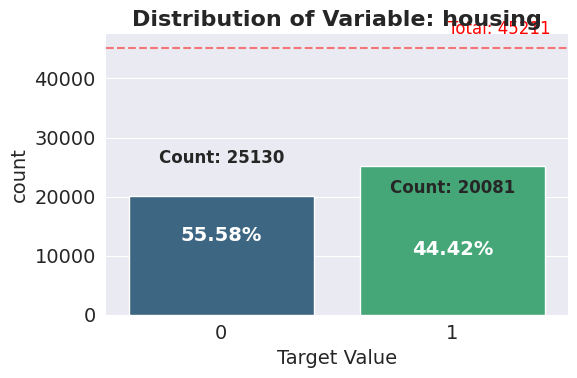


Class Distribution:
   Class  count  Percentage (%)
0      1  25130           55.58
1      0  20081           44.42


/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


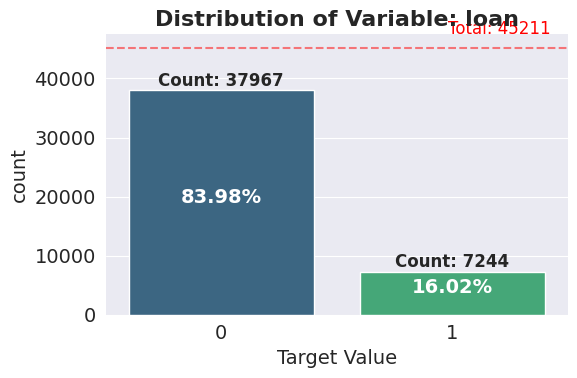


Class Distribution:
   Class  count  Percentage (%)
0      0  37967           83.98
1      1   7244           16.02


/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


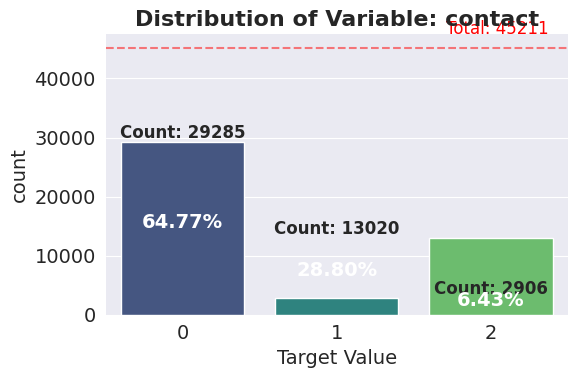


Class Distribution:
   Class  count  Percentage (%)
0      0  29285           64.77
1      2  13020           28.80
2      1   2906            6.43


/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


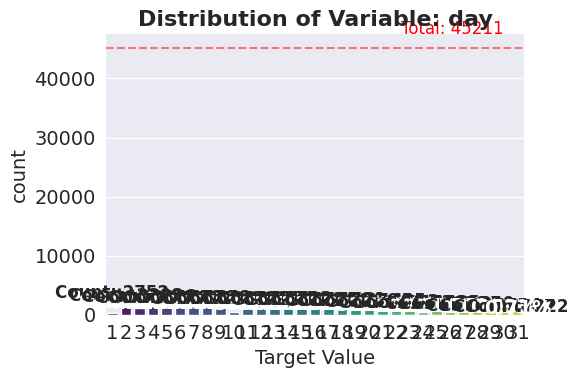


Class Distribution:
    Class  count  Percentage (%)
0      20   2752            6.09
1      18   2308            5.10
2      21   2026            4.48
3      17   1939            4.29
4       6   1932            4.27
5       5   1910            4.22
6      14   1848            4.09
7       8   1842            4.07
8      28   1830            4.05
9       7   1817            4.02
10     19   1757            3.89
11     29   1745            3.86
12     15   1703            3.77
13     12   1603            3.55
14     13   1585            3.51
15     30   1566            3.46
16      9   1561            3.45
17     11   1479            3.27
18      4   1445            3.20
19     16   1415            3.13
20      2   1293            2.86
21     27   1121            2.48
22      3   1079            2.39
23     26   1035            2.29
24     23    939            2.08
25     22    905            2.00
26     25    840            1.86
27     31    643            1.42
28     10    524      

/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


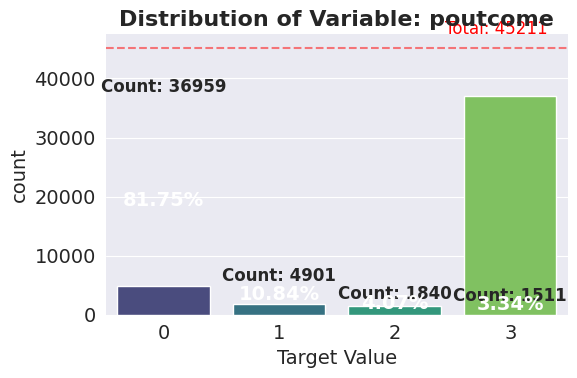


Class Distribution:
   Class  count  Percentage (%)
0      3  36959           81.75
1      0   4901           10.84
2      1   1840            4.07
3      2   1511            3.34


/home/jmustama/cs273p/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


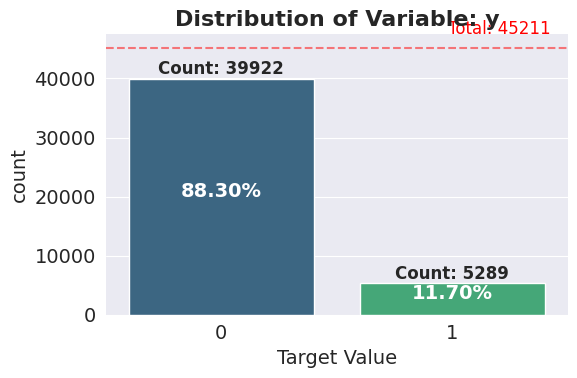


Class Distribution:
   Class  count  Percentage (%)
0      0  39922            88.3
1      1   5289            11.7


In [11]:
cats = ['job', 'marital', 'education', 'housing','loan', 'contact', 'day', 'poutcome', 'y']

for cat in cats: 
    dh.plot(df, cat, 'count')

# dh.plot(df, )